In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import utility
from utils.encoder import OneHotEncoder, ThermometerEncoder, IntegerEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.metrics import classification_report
from ucimlrepo import fetch_ucirepo 

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
  
# fetch dataset 
car_evaluation = fetch_ucirepo(id=19) 
  
# data (as pandas dataframes) 
data = car_evaluation.data.features 
target = car_evaluation.data.targets 
df = pd.concat([data, target],axis=1)


In [21]:
label=['class']
ordinal_features = list(set(df.columns) - (set(label)))

In [22]:
unique_dic = utility.df_to_dict(df)
label_dic = {'class': ['unacc', 'acc', 'good', 'vgood']}
ordinal_dic = {k: unique_dic[k] for k in set(unique_dic).intersection(ordinal_features)}
ordinal_dic['maint'] = np.flip(ordinal_dic['maint'])
ordinal_dic['buying'] = np.flip(ordinal_dic['buying'])

# ordinal_dic_plus = {key: ordinal_dic[key] for key in ordinal_features_plus}
ord_num = sum([len(val) for val in ordinal_dic.values()])
ord_num, len(ordinal_dic)

(21, 6)

In [23]:
ordinal_dic['buying']

array(['low', 'med', 'high', 'vhigh'], dtype=object)

In [24]:
df=pd.concat([data, target],axis=1)
df.to_csv('clean_dataset/car_evaluation/car_evaluation.csv',index=False)
feature_dic = {'ordinal': ordinal_dic, 'label': label_dic}
import pickle
with open('clean_dataset/car_evaluation/car_evaluation_dic.pkl', 'wb') as f:
    pickle.dump(feature_dic, f)

Text(0.5, 1.0, 'Car Evaluation')

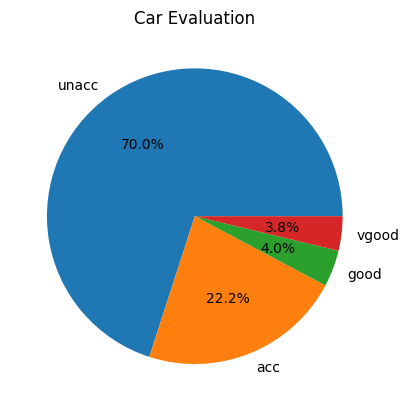

In [25]:
labels = list(label_dic.values())[0]
sizes = [len(df[df['class'] == val]) for val in labels]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Car Evaluation')

In [26]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [27]:
# import random
# from sklearn.model_selection import KFold
# k=10
# regr = LogisticRegression(C=40, multi_class='multinomial')
# test_pred_res, test_true_res = [], []
# train_pred_res, train_true_res = [], []
# # sc = StandardScaler()
# kf = KFold(k)   
# X = df.iloc[:, :-1]
# y = df.iloc[:, -1]
# for train_index, test_index in kf.split(df):
#     X_train, y_train, X_test, y_test = X.iloc[train_index], pd.DataFrame(y.iloc[train_index]), X.iloc[test_index], pd.DataFrame(y.iloc[test_index])
#     # random_train, random_test, _ = utility.encoding_pipeline(X_train[ordinal_features_plus], X_test[ordinal_features_plus], ThermometerEncoder, ordinal_dic_plus)
#     # nominal_train, nominal_test, _ = utility.encoding_pipeline(X_train[nominal_features], X_test[nominal_features], OneHotEncoder, nominal_dic)
#     ordinal_train, ordinal_test, _ = utility.encoding_pipeline(X_train[ordinal_features], X_test[ordinal_features], IntegerEncoder, ordinal_dic)
#     # other_train, other_test = np.array(X_train[other_features].values), np.array(X_test[other_features].values)
#     # sc.fit(other_train)
#     # other_train, other_test = sc.transform(other_train), sc.transform(other_test)
#     # y_train, y_test, _ = utility.encoding_pipeline(y_train, y_test, IntegerEncoder, label_dic)
#     # X_train_all, X_test_all = ordinal_train, ordinal_test
#     X_train_all, X_test_all = np.concatenate([ordinal_train], axis=1), np.concatenate([ordinal_test], axis=1)
#     # X_train_all, X_test_all = np.concatenate([other_train, nominal_train, ordinal_train, random_train], axis=1), np.concatenate([other_test, nominal_test, ordinal_test, random_test], axis=1)
#     regr.fit(X_train_all, y_train)
#     y_pred_test = regr.predict(X_test_all)
#     y_pred_train = regr.predict(X_train_all)
#     test_true_res = test_true_res+ [np.squeeze(y_test)] if len(test_true_res)> 0 else [np.squeeze(y_test)]
#     test_pred_res = test_pred_res+ [np.squeeze(y_pred_test)] if len(test_pred_res)> 0 else [np.squeeze(y_pred_test)]
#     train_true_res = train_true_res+ [np.squeeze(y_train)] if len(train_true_res)> 0 else [np.squeeze(y_train)]
#     train_pred_res = train_pred_res+ [np.squeeze(y_pred_train)] if len(train_pred_res)> 0 else [np.squeeze(y_pred_train)]

# test_temp_res, train_temp_res = [], []
# for i in range(k):
#     test_temp_res.append(classification_report(test_true_res[i], test_pred_res[i], output_dict=True)) 
#     train_temp_res.append(classification_report(train_true_res[i], train_pred_res[i], output_dict=True)) 
# clf_rep_dic_test, clf_rep_dic_train = utility.concat_dic(*test_temp_res), utility.concat_dic(*train_temp_res)
# test_res, train_res = utility.mean_std_dic(clf_rep_dic_test), utility.mean_std_dic(clf_rep_dic_train)

In [32]:
res, models, res_train = utility.k_fold_validation(k=10, 
                  df=df, 
                  encoders=[OneHotEncoder, ThermometerEncoder, IntegerEncoder],  
                  pred_task=
                    {
                      'name': 'classification',
                      'model': LogisticRegression(C=40, multi_class='multinomial'),
                      'metric': {'clf_rep': lambda y_true, y_pred: classification_report(y_true, y_pred, output_dict=True)}
                    }, 
                  features=
                    {
                      'ordinal': {
                        'name': ordinal_features,
                        'dict': ordinal_dic
                      },
                      'label': label_dic
                    },
                    return_model=True,
                    train_result=True)

c:\Users\wmarc\anaconda3\envs\bthesis\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\wmarc\anaconda3\envs\bthesis\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\wmarc\anaconda3\envs\bthesis\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\wmarc\anaconda3\envs\bthesis\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACH

In [10]:
k=10
classes= list(label_dic.values())[0]
class_num = 1 if len(classes) == 2 else len(classes)
spec_dic  = {classes[j]: {key: [] for key in ordinal_dic.keys()} for j in range(len(classes))}
for i in range(k):
    ohe_1 = models['OneHotEncoder'][i]
    te_1 = models['ThermometerEncoder'][i]
    ie_1 = models['IntegerEncoder'][i]

    ord_num = sum([len(val) for val in ordinal_dic.values()])
    ohe_1_coef,te_1_coef, ie_1_coef = ohe_1.coef_.squeeze(), te_1.coef_.squeeze(), ie_1.coef_.squeeze()
    for j in range(class_num):
        ord_coef_dic = utility.create_coef_dic(0, ordinal_dic, ordinal_features, ohe_1_coef[j],te_1_coef[j])
        ord_coef_dic_cum = {key: [val[0]]+[np.cumsum(val[1])] for key, val in ord_coef_dic.items()}
        for key, val in ord_coef_dic_cum.items():
            spec_dic[classes[j]][key] += [np.corrcoef(val)[0][1]]    
spec_dic_mean_std = {key: {key2: (np.mean(val2), np.std(val2)) for key2, val2 in val.items()} for key, val in spec_dic.items()}  


In [11]:
spec_dic_mean_std

{'unacc': {'buying': (0.9976596849373148, 0.0015429892182418279),
  'safety': (0.9999122517361639, 7.562711211169062e-05),
  'doors': (0.999495578466054, 0.0005593112940947903),
  'maint': (0.9992688113682746, 0.0003368092542173603),
  'lug_boot': (0.999949596468069, 3.407306558853504e-05),
  'persons': (0.9999970797158053, 2.004151024530358e-06)},
 'acc': {'buying': (0.990797809497001, 0.006176209888828566),
  'safety': (0.8718182170572563, 0.062170463081799465),
  'doors': (0.9965154458375947, 0.002865963178273771),
  'maint': (0.9971131274775658, 0.0015833317788029944),
  'lug_boot': (0.999825972157575, 0.00015469534408934065),
  'persons': (0.967652486808832, 0.021865312884901157)},
 'good': {'buying': (0.9937324658901941, 0.004812383108546918),
  'safety': (0.9992822070389351, 0.0010667135187461953),
  'doors': (0.9967409114902488, 0.005693038916183926),
  'maint': (0.9903433975101636, 0.005504061603205452),
  'lug_boot': (0.9986219113643251, 0.0017885381429770609),
  'persons': (

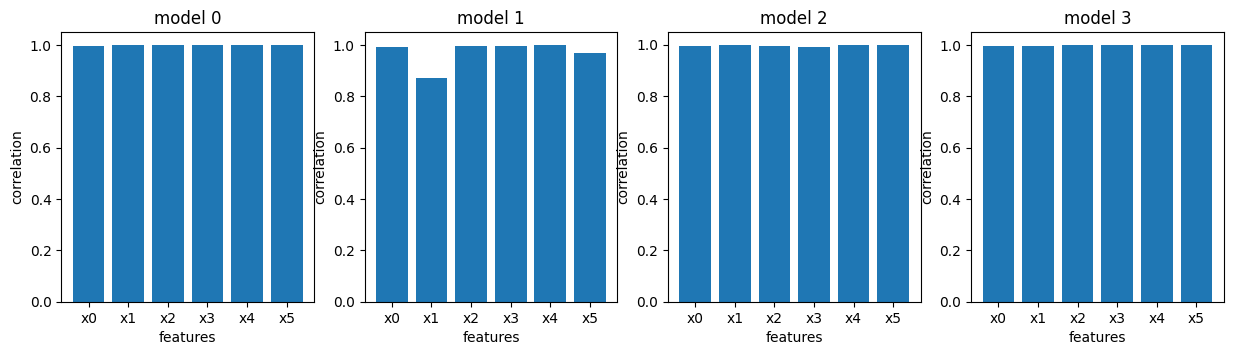

In [12]:
fig, ax = plt.subplots(1,4, figsize=(15,3.5))
ax = ax.ravel()
for j, (_, spec) in enumerate(spec_dic_mean_std.items()):
    spec_plot = {key: val[0] for key, val in spec.items()}
    ax[j].bar([f'x{i}' for i in range(len(spec_plot))], spec_plot.values())
    ax[j].set_xlabel('features')
    ax[j].set_ylabel('correlation')
    ax[j].set_title(f'model {j}')

In [13]:
ord_num = sum([len(val) for val in ordinal_dic.values()])
class_choice = 0
all_ohe_coef = np.array([models['OneHotEncoder'][i].coef_.squeeze()[class_choice] for i in range(k)])
all_te_coef = np.array([models['ThermometerEncoder'][i].coef_.squeeze()[class_choice] for i in range(k)])
# all_te_coef_cumsum = [np.cumsum(all_te_coef[:, other_num+nom_num:], axis=1) for i in [len(val) for val in ordinal_dic.values()]]
all_te_coef_cumsum = []
s=0
for i in [len(val) for val in ordinal_dic.values()]:
    all_te_coef_cumsum.append(np.cumsum(all_te_coef[:, s:s+i], axis=1))
    s+=i
all_te_coef_cumsum = np.concatenate(tuple(all_te_coef_cumsum), axis=1)
all_ie_coef = np.array([models['IntegerEncoder'][i].coef_.squeeze()[class_choice] for i in range(k)])


all_ohe_coef_mean = np.mean(all_ohe_coef, axis=0)
# all_te_coef_mean = np.array(list(np.mean(all_te_coef, axis=0)[:other_num+nom_num]) + list(np.mean(all_te_coef_cumsum, axis=0)))
all_te_coef_mean = np.mean(all_te_coef_cumsum, axis=0)
all_ie_coef_mean = np.mean(all_ie_coef, axis=0)
all_ie_coef_temp = []
for idx, i in enumerate([len(val) for val in ordinal_dic.values()]):
    all_ie_coef_temp.append(np.array([all_ie_coef_mean[idx]]*i)*np.linspace(1,i,i))
all_ie_coef_mean = np.concatenate(tuple(all_ie_coef_temp))
# all_ie_coef_mean = np.concatenate((all_ie_coef_mean, all_ie_coef_temp))

# all_ohe_coef_mean = StandardScaler().fit_transform(all_ohe_coef_mean.reshape(-1, 1)).squeeze()
# all_te_coef_mean = StandardScaler().fit_transform(all_te_coef_mean.reshape(-1, 1)).squeeze()
# all_ie_coef_mean = StandardScaler().fit_transform(all_ie_coef_mean.reshape(-1, 1)).squeeze()

all_ohe_coef_std = np.std(all_ohe_coef, axis=0)
all_te_coef_std = np.std(all_te_coef_cumsum, axis=0)
all_ie_coef_std = np.std(all_ie_coef, axis=0)
all_ie_coef_temp = []
for idx, i in enumerate([len(val) for val in ordinal_dic.values()]):
    all_ie_coef_temp.append(np.array([all_ie_coef_std[idx]]*i)*np.array([1]*i))
all_ie_coef_std = np.concatenate(tuple(all_ie_coef_temp))

# all_ohe_coef.shape, all_te_coef.shape, all_ie_coef.shape
all_ohe_coef_mean.shape, all_te_coef_mean.shape, all_ie_coef_mean.shape
# all_ohe_coef_std.shape, all_te_coef_std.shape, all_ie_coef_std.shape

((21,), (21,), (21,))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


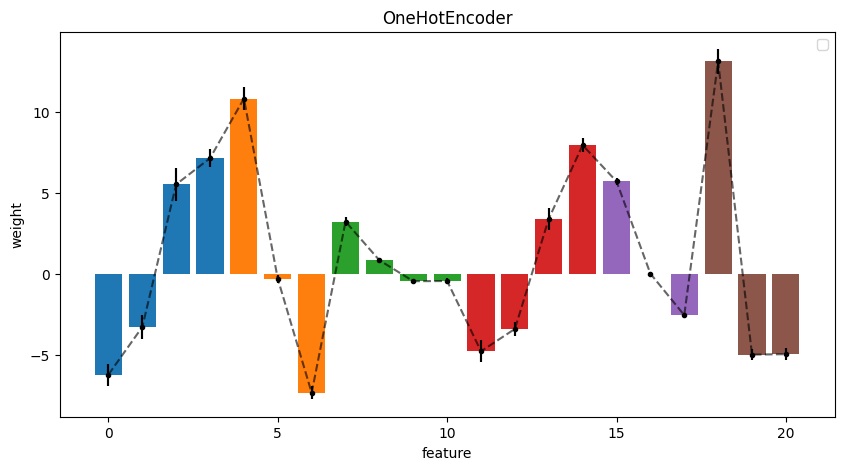

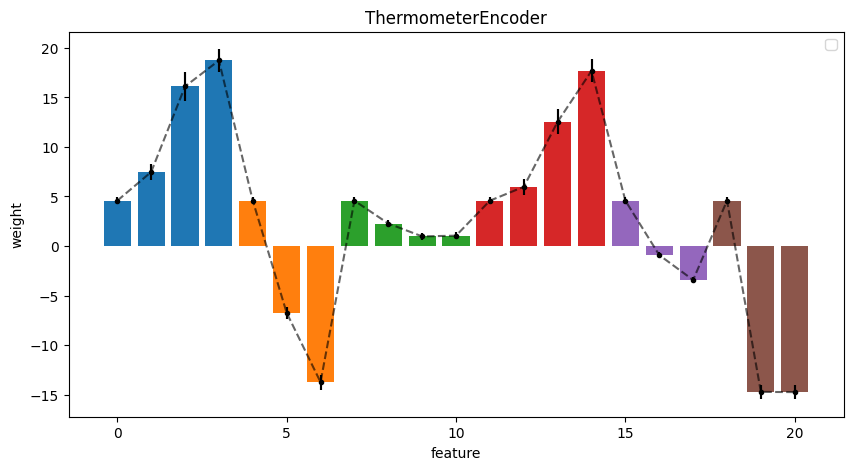

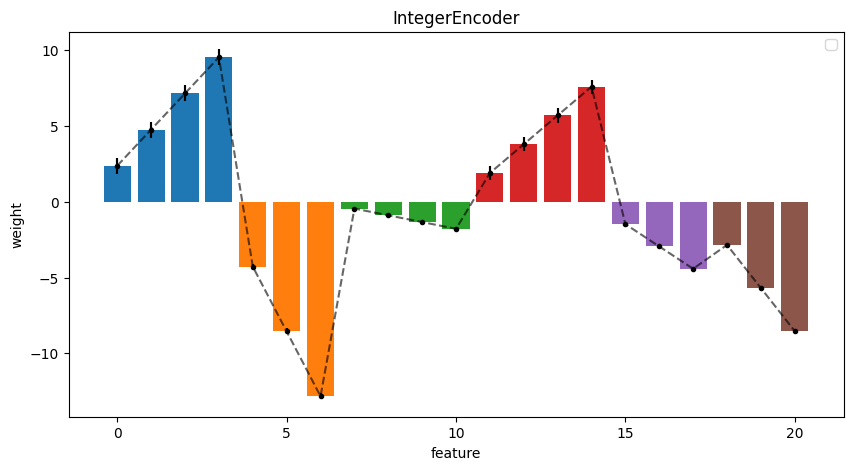

In [14]:
title = ["OneHotEncoder", "ThermometerEncoder", "IntegerEncoder"]
label = ['Numerical', 'Nominal', 'Ordinal']
for idx, (all_mean, all_std) in enumerate(zip([all_ohe_coef_mean, all_te_coef_mean, all_ie_coef_mean], [all_ohe_coef_std, all_te_coef_std, all_ie_coef_std])):
    plt.figure(figsize=(10,5))
    start_2 = 0
    for j in [len(val) for val in ordinal_dic.values()]:  
        plt.bar(range(len(all_mean))[start_2:start_2+j], all_mean[start_2:start_2+j])
        start_2 += j
        
    plt.errorbar(range(len(all_mean)), all_mean, all_std, color='black', fmt='.')
    plt.errorbar(range(len(all_mean)), all_mean, all_std, color='black', fmt='--', alpha=0.6)
    plt.title(title[idx])
    plt.ylabel('weight'), plt.xlabel('feature')
    plt.legend()


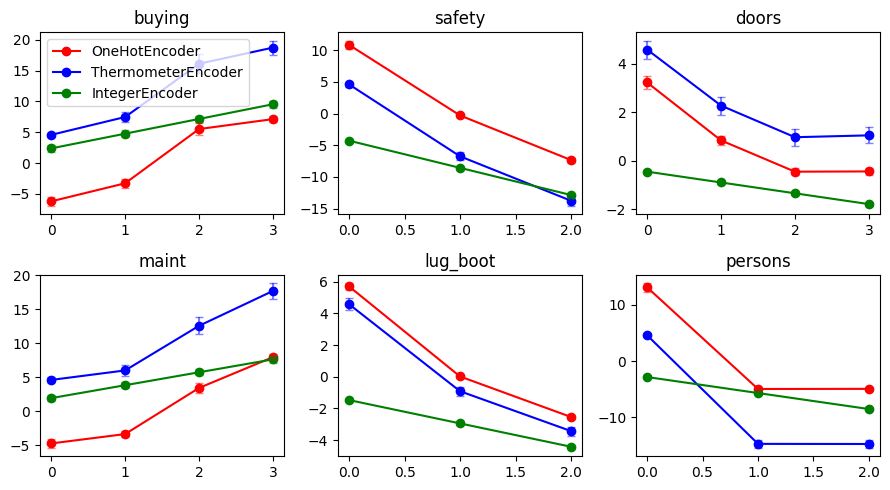

In [20]:
import matplotlib.pyplot as plt
import math
label=['OneHotEncoder', 'ThermometerEncoder', 'IntegerEncoder']
color = ['r', 'b', 'g']
keys = list(ordinal_dic.keys())
fig, ax = plt.subplots(2, 3, figsize=(9,5))
ax=ax.ravel()
ord_num_list = [len(val) for val in ordinal_dic.values()]
# fig.suptitle('ordinal')
start = 0
for i, axe in enumerate(ax.ravel()):
    cur_len = ord_num_list[i] 
    cur_list = range(cur_len)
    axe.plot(cur_list, all_ohe_coef_mean[start: start+cur_len], label = label[0], color=color[0], marker='o')
    axe.plot(cur_list, all_te_coef_mean[start: start+cur_len], label = label[1], color=color[1], marker='o')
    axe.plot(cur_list, all_ie_coef_mean[start: start+cur_len], label = label[2], color=color[2], marker='o')
    (_,caps1,_) = axe.errorbar(cur_list, all_ohe_coef_mean[start: start+cur_len], all_ohe_coef_std[start: start+cur_len],alpha = 0.5,color=color[0], fmt='.', capsize = 3)
    (_,caps2,_) = axe.errorbar(cur_list, all_te_coef_mean[start: start+cur_len], all_te_coef_std[start: start+cur_len],alpha = 0.5, color=color[1], fmt='.', capsize = 3)
    (_,caps3,_) = axe.errorbar(cur_list, all_ie_coef_mean[start: start+cur_len], all_ie_coef_std[start: start+cur_len],alpha = 0.5, color=color[2], fmt='.', capsize = 3)
    for cap in caps1+caps2+caps3:
        cap.set_markeredgewidth(1)
    axe.set_title(keys[i])
    axe.set_ylabel('weight')
    axe.set_xlabel('features')
    start += cur_len
ax[0].legend()     
plt.tight_layout()

In [34]:
import math
def deep_copy(dic):
    dic_res = {}
    for key, val in dic.items():
        dic_res[key] = deep_copy(val) if isinstance(val, dict) else val
    return dic_res
def round_decimal_places(df, d):
    dec = math.pow(10,d)
    df_copy = df.copy()
    df_copy = df_copy.map(lambda x: (math.ceil(x[0]*dec)/dec, math.ceil(x[1]*dec)/dec))
    return df_copy
res_temp = res
res_copy = deep_copy(res_temp)
d = 12
for encoder in res.keys():
    res_copy[encoder]['clf_rep']['accuracy'] = {key: res_temp[encoder]['clf_rep']['accuracy'] for key in res_copy[encoder]['clf_rep']['macro avg'].keys()}
# df_lists = [pd.DataFrame(res_copy[key.__str__()]['clf_rep']).rename_axis(key.__str__(), axis="columns") for key in res_copy.keys()]
df_lists = [round_decimal_places(pd.DataFrame(res_copy[key.__str__()]['clf_rep']).rename_axis(key.__str__(), axis="columns").drop(index='support'), d) for key in res_copy.keys()]

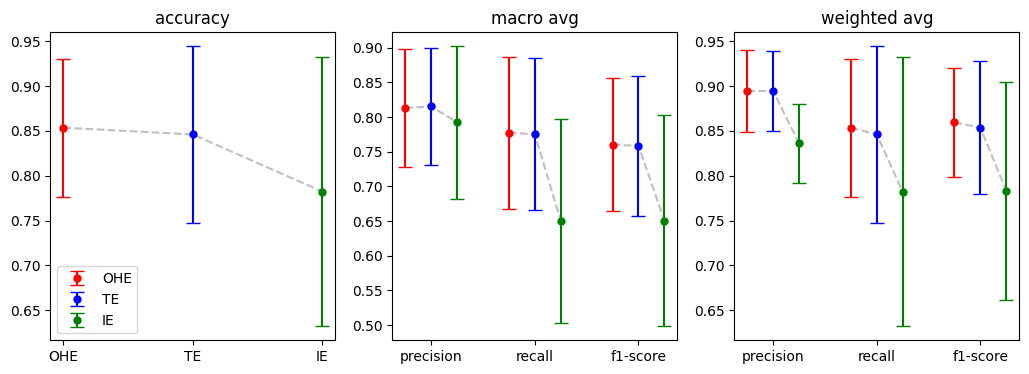

In [35]:
import matplotlib.pyplot as plt

plot_dic = {}
metrics = ['accuracy','macro avg', 'weighted avg']
inner_metrics = ['precision', 'recall', 'f1-score']

plot_dic = {}
for key in metrics:
    plot_dic[key] = {k: [] for k in inner_metrics}
    for key2 in inner_metrics:
        for dfs in df_lists:
            df_dict = dfs.to_dict()
            plot_dic[key][key2].append(list(df_dict[key][key2]))
            
            
models = ["OneHotEncoder", "ThermometerEncoder", "IntegerEncoder"]
model_names = ['OHE', 'TE', 'IE']
colors = ['r', 'b', 'g']
x_axis_placement = np.array([-0.25, 0, 0.25])
fig, ax = plt.subplots(1, 3, figsize=(12.5,4))
ax = ax.ravel()
for i, (key, val) in enumerate(plot_dic.items()):
    if key == 'accuracy':
        accs = np.array(val['precision'])
        ax[i].errorbar(range(len(accs)), accs[:,0], accs[:,1], alpha = 0.5, fmt='--', color = 'grey') 
        for j, (mean, std) in enumerate(accs):
            (_,caps,_)= ax[i].errorbar(j, accs[:,0][j], accs[:,1][j], label=model_names[j],color = colors[j], alpha = 1, fmt='.', markersize=10, capsize = 5) 
            for cap in caps:
                cap.set_markeredgewidth(1)
    else:  
        for j, (key2, val2) in enumerate(val.items()):
            model = np.array(val2)    
            x_axis=np.ones(len(model))*j
            ax[i].errorbar(x_axis + x_axis_placement, model[:,0], model[:,1], alpha = 0.5, fmt='--', color = 'grey')
            for k in range(len(x_axis)):
                (_,caps,_)= ax[i].errorbar(j + x_axis_placement[k], model[:,0][k], model[:,1][k], label=model_names[k], color = colors[k], alpha = 1, fmt='.', markersize=10, capsize = 5) if j == 0 else ax[i].errorbar(j + x_axis_placement[k], model[:,0][k], model[:,1][k], color = colors[k], alpha = 1, fmt='.', markersize=10, capsize = 5) 
                for cap in caps:
                    cap.set_markeredgewidth(1)
for i, axe in enumerate(ax):
    axe.set_title(metrics[i])
    if metrics[i] == 'accuracy':
        axe.set_xticks(range(len(models)), model_names)
    else:
        axe.set_xticks(range(len(inner_metrics)), inner_metrics)

ax[0].legend()             
                

In [36]:
res['OneHotEncoder']

{'clf_rep': {'1.0': {'precision': (0.9477054798949804, 0.05836392622165255),
   'recall': (0.906611570247934, 0.09053642624842342),
   'f1-score': (0.9218713512270726, 0.04658542125932503),
   'support': (121.0, 0.0)},
  '2.0': {'precision': (0.7729636565250046, 0.14043180026046712),
   'recall': (0.7297570850202428, 0.2004710174014448),
   'f1-score': (0.7224170077241718, 0.11985397213974022),
   'support': (38.4, 0.4898979485566356)},
  '3.0': {'precision': (0.7340530925013684, 0.2734177433340248),
   'recall': (0.6714285714285715, 0.24784787961282106),
   'f1-score': (0.6341836105071399, 0.21239940999093213),
   'support': (6.9, 0.3)},
  '4.0': {'precision': (0.7972222222222223, 0.1908263219491994),
   'recall': (0.8023809523809524, 0.22639088865747267),
   'f1-score': (0.7602791068580543, 0.14432953616755),
   'support': (6.5, 0.5)},
  'accuracy': (0.85354550342788, 0.07709939168467105),
  'macro avg': {'precision': (0.8129861127858939, 0.08537259542736605),
   'recall': (0.7775445

In [16]:
with open('car_evaluation/car_evaluation_c_40.csv','w') as f:
    for df in df_lists:
        f.write(f"{df.columns.name}\n")
        df.to_csv(f)
        f.write("\n")